<h2>Problem Overview

1. Goal: Train an MLP to classify the XOR function.

2. XOR truth table:

| Input 1 | Input 2 | XOR Output |
| ------- | ------- | ---------- |
| 0       | 0       | 0          |
| 0       | 1       | 1          |
| 1       | 0       | 1          |
| 1       | 1       | 0          |


- XOR is not linearly separable, so a simple perceptron fails. MLP with hidden layer solves it.

In [4]:
# ------------------------
#  Import Libraries
# ------------------------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
# ------------------------
#  Prepare Dataset
# ------------------------
# XOR Inputs
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

In [6]:
# -------------------------------
#  Define Activation Functions
# -------------------------------
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [7]:
# -----------------------------------------------
#  Initialize Network
# -----------------------------------------------
# 2 input neurons, 2 hidden neurons, 1 output neuron
np.random.seed(42)

input_size = 2
hidden_size = 2
output_size = 1
learning_rate = 0.1

# Weights
W1 = np.random.uniform(-1, 1, (input_size, hidden_size))
b1 = np.zeros((1, hidden_size))
W2 = np.random.uniform(-1, 1, (hidden_size, output_size))
b2 = np.zeros((1, output_size))

In [8]:
# ------------------------
# Train MLP
# ------------------------
epochs = 10000
losses = []

for epoch in range(epochs):
    # Forward pass
    hidden_input = np.dot(X, W1) + b1
    hidden_output = sigmoid(hidden_input)

    final_input = np.dot(hidden_output, W2) + b2
    final_output = sigmoid(final_input)

    # Compute loss (MSE)
    loss = np.mean((y - final_output) ** 2)
    losses.append(loss)

    # Backpropagation
    error = y - final_output
    d_output = error * sigmoid_derivative(final_output)

    error_hidden = d_output.dot(W2.T)
    d_hidden = error_hidden * sigmoid_derivative(hidden_output)

    # Update weights
    W2 += hidden_output.T.dot(d_output) * learning_rate
    b2 += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    W1 += X.T.dot(d_hidden) * learning_rate
    b1 += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

Accuracy: 100.00%


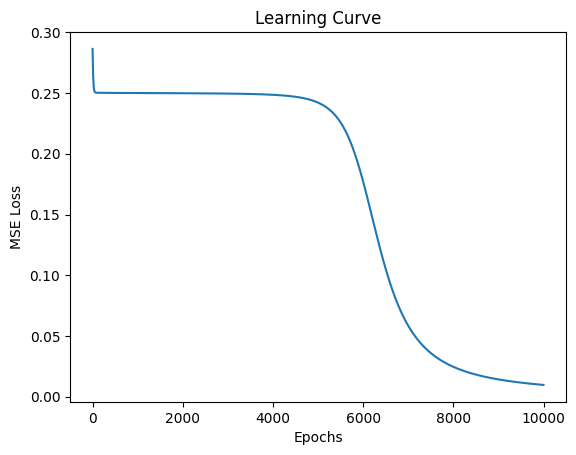

In [9]:
# ------------------------------
# Evaluate and Visualize
# ------------------------------
# Predictions
predictions = final_output > 0.5
accuracy = accuracy_score(y, predictions)
print(f"Accuracy: {accuracy*100:.2f}%")

# Plot learning curve
plt.plot(losses)
plt.title("Learning Curve")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()

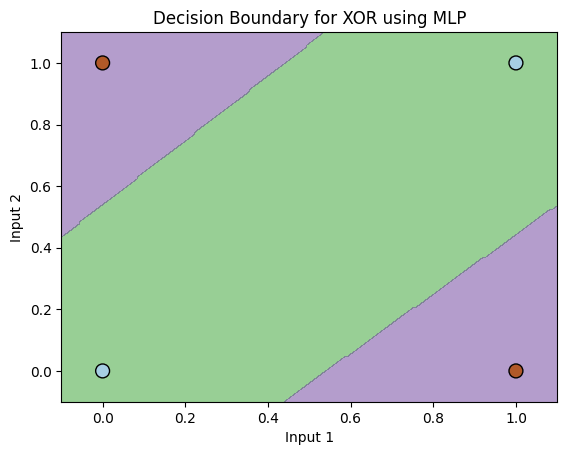

In [10]:
# -------------------------------------
# Decision Boundary Visualization
# -------------------------------------
# Create a grid of points
x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Forward pass for each grid point
grid = np.c_[xx.ravel(), yy.ravel()]
hidden = sigmoid(np.dot(grid, W1) + b1)
output = sigmoid(np.dot(hidden, W2) + b2)
pred = output.reshape(xx.shape)

# Plot
plt.contourf(xx, yy, pred > 0.5, alpha=0.5, cmap=plt.cm.Paired)
plt.scatter(X[:,0], X[:,1], c=y.flatten(), edgecolors='k', cmap=plt.cm.Paired, s=100)
plt.title("Decision Boundary for XOR using MLP")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.show()


<h2>Summary & Insights :

1️⃣ **Why XOR Needs an MLP -**

1. XOR is not linearly separable, meaning a single-layer perceptron cannot find a straight line to separate the classes.

2. Adding a hidden layer allows the network to combine features non-linearly, enabling it to correctly classify XOR inputs.

2️⃣ **Hidden Layer Intuition -**

1. Hidden neurons act as intermediate feature detectors.

2. For XOR:

       One neuron may activate when at least one input is 1.

       Another neuron may activate when both inputs are 1.

3. The output neuron then combines these signals to produce the correct XOR result.

3️⃣ **Observations from Training -**

1. Learning curve shows the Mean Squared Error (MSE) decreasing steadily.

2. Accuracy reaches 100% after sufficient epochs.

3. Decision boundary plot visualizes how the MLP “twists” the input space to separate classes—something a single-layer perceptron cannot achieve.
